# Project_12 - Regression (Car)

## Project Description
<br>Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training
   
**Data description**
<br>The dataset is stored in file datasets/project_07_dataset.csv

**Features**
- DateCrawled — date profile was downloaded from the database
- VehicleType — vehicle body type
- RegistrationYear — vehicle registration year
- Gearbox — gearbox type
- Power — power (hp)
- Model — vehicle model
- Mileage — mileage (measured in km due to dataset's regional specifics)
- RegistrationMonth — vehicle registration month
- FuelType — fuel type
- Brand — vehicle brand
- NotRepaired — vehicle repaired or not
- DateCreated — date of profile creation
- NumberOfPictures — number of vehicle pictures
- PostalCode — postal code of profile owner (user)
- LastSeen — date of the last activity of the user

**Target**
- Price — price (Euro)

## Data preparation

In [8]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
import lightgbm as lgb

In [9]:
#import dataset
df = pd.read_csv('datasets/project_07_dataset.csv')
display(df.head())

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


#df.to_csv('~/work/project_datasets/project_07_dataset.csv', index=False, header=list(df.columns))

In [10]:
#check the data for missing values and outliers
display(df.info())
display(df.describe(include='all', datetime_is_numeric=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
count,354369,354369.000000,316879,354369.000000,334536,354369.000000,334664,354369.000000,354369.000000,321474,354369,283215,354369,354369.0,354369.000000,354369
unique,15470,NaN,8,NaN,2,NaN,250,NaN,NaN,7,40,2,109,NaN,NaN,18592
top,05/03/2016 14:25,NaN,sedan,NaN,manual,NaN,golf,NaN,NaN,petrol,volkswagen,no,03/04/2016 00:00,NaN,NaN,07/04/2016 07:16
freq,66,NaN,91457,NaN,268251,NaN,29232,NaN,NaN,216352,77013,247161,13719,NaN,NaN,654
mean,NaN,4416.656776,NaN,2004.234448,NaN,110.094337,NaN,128211.172535,5.714645,NaN,NaN,NaN,NaN,0.0,50508.689087,NaN
std,NaN,4514.158514,NaN,90.227958,NaN,189.850405,NaN,37905.341530,3.726421,NaN,NaN,NaN,NaN,0.0,25783.096248,NaN
min,NaN,0.000000,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,1050.000000,NaN,1999.000000,NaN,69.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30165.000000,NaN
50%,NaN,2700.000000,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49413.000000,NaN
75%,NaN,6400.000000,NaN,2008.000000,NaN,143.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71083.000000,NaN


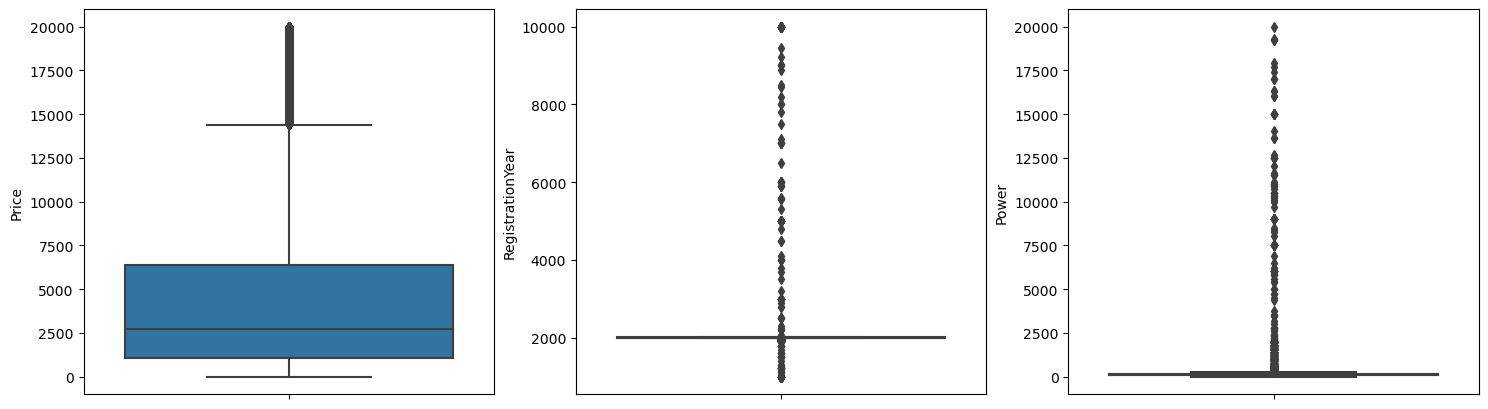

In [11]:
#visualize features to find outliers or incorrect values
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(data=df, y=df['Price'], ax=axes[0])
sns.boxplot(data=df, y=df['RegistrationYear'], ax=axes[1])
sns.boxplot(data=df, y=df['Power'], ax=axes[2])
plt.show()

In [12]:
#check 'Power' column's data range to see where the reasonable outlier cutoff could be
display(df['Power'].quantile(0.95))
display(df['Power'].quantile(0.99))

218.0

300.0

In [13]:
#filter out the outliers
mask0 = (df['RegistrationYear'] >= 1900) & (df['RegistrationYear'] <= 2023)
mask1 = df['Power'] <= df['Power'].quantile(0.99)

df_filtered = df[mask0 & mask1]

In [14]:
#remove NaN values from columns where there is no reference to fill them properly
df_filtered = df_filtered.dropna(subset=['Model', 'Gearbox'])
display(df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315840 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        315840 non-null  object
 1   Price              315840 non-null  int64 
 2   VehicleType        292313 non-null  object
 3   RegistrationYear   315840 non-null  int64 
 4   Gearbox            315840 non-null  object
 5   Power              315840 non-null  int64 
 6   Model              315840 non-null  object
 7   Mileage            315840 non-null  int64 
 8   RegistrationMonth  315840 non-null  int64 
 9   FuelType           296291 non-null  object
 10  Brand              315840 non-null  object
 11  NotRepaired        263590 non-null  object
 12  DateCreated        315840 non-null  object
 13  NumberOfPictures   315840 non-null  int64 
 14  PostalCode         315840 non-null  int64 
 15  LastSeen           315840 non-null  object
dtypes: int64(7), object(

None

In [15]:
#use 'Model' column as the reference to fill NaN values. Mode is used, as these are categorical columns
df_filtered['VehicleType'] = df_filtered.groupby('Model')['VehicleType'].transform(lambda x: x.fillna(x.mode().iloc[0]))
df_filtered['FuelType'] = df_filtered.groupby('Model')['FuelType'].transform(lambda x: x.fillna(x.mode().iloc[0]))
df_filtered['NotRepaired'] = df_filtered['NotRepaired'].fillna('Unknown')
display(df_filtered.isna().sum().sum())

0

In [16]:
df_filtered.drop_duplicates(keep='first', inplace=True)
display(df_filtered.duplicated().sum())

0

In [17]:
display(df_filtered.describe(include='all'))

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
count,315579,315579.000000,315579,315579.000000,315579,315579.000000,315579,315579.000000,315579.000000,315579,315579,315579,315579,315579.0,315579.000000,315579
unique,15275,NaN,8,NaN,2,NaN,250,NaN,NaN,7,39,3,105,NaN,NaN,17943
top,05/03/2016 14:25,NaN,sedan,NaN,manual,NaN,golf,NaN,NaN,petrol,volkswagen,no,03/04/2016 00:00,NaN,NaN,07/04/2016 07:16
freq,63,NaN,95756,NaN,254940,NaN,27640,NaN,NaN,214200,69226,231190,12306,NaN,NaN,589
mean,NaN,4547.861391,NaN,2003.229819,NaN,109.489817,NaN,128798.399133,5.905593,NaN,NaN,NaN,NaN,0.0,50759.727754,NaN
std,NaN,4510.496988,NaN,6.957616,NaN,56.218810,NaN,36635.605030,3.634671,NaN,NaN,NaN,NaN,0.0,25782.219037,NaN
min,NaN,0.000000,NaN,1910.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,1200.000000,NaN,1999.000000,NaN,75.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30453.000000,NaN
50%,NaN,2900.000000,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.000000,NaN
75%,NaN,6500.000000,NaN,2008.000000,NaN,143.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71336.000000,NaN


## Model training

In [18]:
#dropping irrelevant columns from the dataset
df_filtered2 = df_filtered.drop(['DateCrawled', 'RegistrationMonth', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], axis=1)
df_filtered2.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
0,480,sedan,1993,manual,0,golf,150000,petrol,volkswagen,Unknown
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,Unknown
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes


In [19]:
#creating and splitting the feature and target datasets
X = pd.get_dummies(df_filtered2.drop(['Price'], axis=1), drop_first=True).values                  
y = df_filtered2['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
#scaling the feature datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
%%time
#Train & evaluate linear regression model as the benchmark
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)
lr_RMSE = MSE(y_test, y_pred, squared=False)

print(f'lr RMSE: {lr_RMSE}')

lr RMSE: 3918912977013.743
Wall time: 3.21 s


In [22]:
%%time
#Train & evaluate lasso regression model as the benchmark
lasso_model = Lasso(alpha=0.05)
lasso_model.fit(X_train_scaled, y_train)

y_pred = lasso_model.predict(X_test_scaled)
lr_RMSE = MSE(y_test, y_pred, squared=False)

print(f'lr RMSE: {lr_RMSE}')

lr RMSE: 2752.487360146261
Wall time: 36.8 s


C:\Users\Hongyu Jin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.380e+10, tolerance: 4.487e+08
  model = cd_fast.enet_coordinate_descent(


In [23]:
%%time
#Train GridSearchCV with random forest regression model
rfr = RandomForestRegressor(random_state=42)
params = {'n_estimators': [50], 'max_depth': [5]}
gscv = GridSearchCV(rfr, param_grid=params, scoring='neg_mean_squared_error', cv=3)
gscv.fit(X_train_scaled, y_train)

print(f'Best Pagrams: {gscv.best_params_}')

Best Pagrams: {'max_depth': 5, 'n_estimators': 50}
Wall time: 6min 23s


In [24]:
#Evaluate GridSearchCV with random forest regression model
best_rfr = gscv.best_estimator_
y_pred = best_rfr.predict(X_test_scaled)
rfr_RMSE = MSE(y_test, y_pred, squared=False)

print(f'rfr RMSE: {rfr_RMSE}')

rfr RMSE: 2468.873741876565


In [25]:
%%time
#Train lightgbm regression model
train_data = lgb.Dataset(X_train_scaled, label=y_train)
params = {"objective": "regression", "metric": "rmse"}
bst = lgb.train(params, train_data)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1152
[LightGBM] [Info] Number of data points in the train set: 220905, number of used features: 287
[LightGBM] [Info] Start training from score 4546.837174
Wall time: 2.28 s


In [26]:
#Evaluate lightgbm regression model
y_pred = bst.predict(X_test_scaled, num_iteration=bst.best_iteration)
bst_RMSE = MSE(y_test, y_pred, squared=False)

print(f'bst RMSE: {bst_RMSE}')

bst RMSE: 1763.358196911033


## Model analysis

<br>Linear Regression Model:
<br>Training time: 17.8s,  Prediction time: 25.5ms, RMSE: 9,808,552,072,955
<br>Comment: Short training and prediction time. But extremely large RMSE.

<br>Lasso Regression Model: 
<br>Training time: 3min 46s, Prediction time: 29.3ms, RMSE: 2752.5
<br>Comment: Long training time, but short prediction time. Reasonable RMSE.

<br>Random Forest Regression Model:
<br>Training time: 5min 37s, Prediction time: 531ms, RMSE: 2468.9
<br>Comment: Long training and prediction time. Reasonable RMSE.

<br>LightGBM Model:
<br>Training time: 16.1s, Prediction time: 1.16s, RMSE: 1763.4
<br>Comment: Fast training but very long prediction time. Best RMSE out of the group. May not be suitable for time critical or near real-time prediction.

*Possibly due to initial server delays, the prediction times were a lot shorter when run a second time.

# Checklist

- [x]  Code is error free
- [x]  The data has been downloaded and prepared
- [x]  The models have been trained
- [x]  The speed and quality of the models have been analyzed